## features

Pregnancies: Number of times pregnant

Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test

BloodPressure: Diastolic blood pressure (mm Hg)

SkinThickness: Triceps skin fold thickness (mm)

Insulin: 2-Hour serum insulin (mu U/ml)

BMI: Body mass index (weight in kg/(height in m)^2)

DiabetesPedigreeFunction: Diabetes pedigree function

Age: Age (years)

Outcome: Class variable (0 or 1) 268 of 768 are 1, the others are 0

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn as sk
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('diabetes.csv')
data

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

In [3]:
data.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [4]:
df = data.copy()
df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

In [5]:
pd.set_option('display.max_rows', 768)
pd.set_option('display.max_columns', 9)
df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
5              5      116             74              0        0  25.6   
6              3       78             50             32       88  31.0   
7             10      115              0              0        0  35.3   
8              2      197             70             45      543  30.5   
9              8      125             96              0        0   0.0   
10             4      110             92              0        0  37.6   
11            10      168             74              0        0  38.0   
12            10      139             80              0        0  27.1   
13             1      189             60             23      846  30.1   
14             5      166             72             19      175  25.8   
15             7      100              0              0        0  30.0   
16             0      118             84             47      230  45.8   
17             7      107             74              0        0  29.6   
18             1      103             30             38       83  43.3   
19             1      115             70             30       96  34.6   
20             3      126             88             41      235  39.3   
21             8       99             84              0        0  35.4   
22             7      196             90              0        0  39.8   
23             9      119             80             35        0  29.0   
24            11      143             94             33      146  36.6   
25            10      125             70             26      115  31.1   
26             7      147             76              0        0  39.4   
27             1       97             66             15      140  23.2   
28            13      145             82             19      110  22.2   
29             5      117             92              0        0  34.1   
30             5      109             75             26        0  36.0   
31             3      158             76             36      245  31.6   
32             3       88             58             11       54  24.8   
33             6       92             92              0        0  19.9   
34            10      122             78             31        0  27.6   
35             4      103             60             33      192  24.0   
36            11      138             76              0        0  33.2   
37             9      102             76             37        0  32.9   
38             2       90             68             42        0  38.2   
39             4      111             72             47      207  37.1   
40             3      180             64             25       70  34.0   
41             7      133             84              0        0  40.2   
42             7      106             92             18        0  22.7   
43             9      171            110             24      240  45.4   
44             7      159             64              0        0  27.4   
45             0      180             66             39        0  42.0   
46             1      146             56              0        0  29.7   
47             2       71             70             27        0  28.0   
48             7      103             66             32        0  39.1   
49             7      105              0              0        0   0.0   
50             1      103             80             11       82  19.4   
51             1      101             50             15       36  24.2   
52             5       88             66             21       23  24.4   
53       

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
null_accuracy = round (max(df.Outcome.values.mean(), 1 - df.Outcome.values.mean()), 2)
print(f'\nNull accuracy score : {null_accuracy*100}%\n')
print('this is the baseline accuracy of our model we need to cross it\n')


Null accuracy score : 65.0%

this is the baseline accuracy of our model we need to cross it



## Checking Outliers

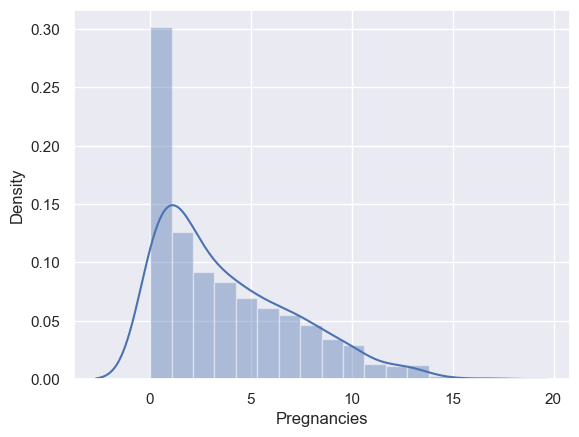

In [9]:
#pregnancies
sns.distplot(df['Pregnancies'])
plt.show()

In [10]:
#on an average women can only get 15 times pregnant
df1 = df[df['Pregnancies']<15]

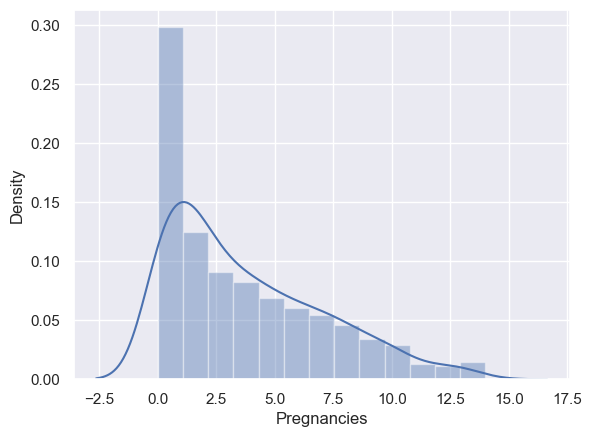

In [11]:
sns.distplot(df1['Pregnancies'])
plt.show()

In [12]:
df1.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   766.000000  766.000000     766.000000     766.000000  766.000000   
mean      3.813316  120.819843      69.100522      20.494778   79.715405   
std       3.315699   31.973419      19.380782      15.950474  115.382727   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   27.000000   
75%       6.000000  140.000000      80.000000      32.000000  127.750000   
max      14.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  766.000000                766.000000  766.000000  766.000000  
mean    31.974282                  0.471842   33.210183    0.347258  
std      7.885705                  0.331326   11.759750    0.476410  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.244000   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.500000                  0.625500   40.750000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

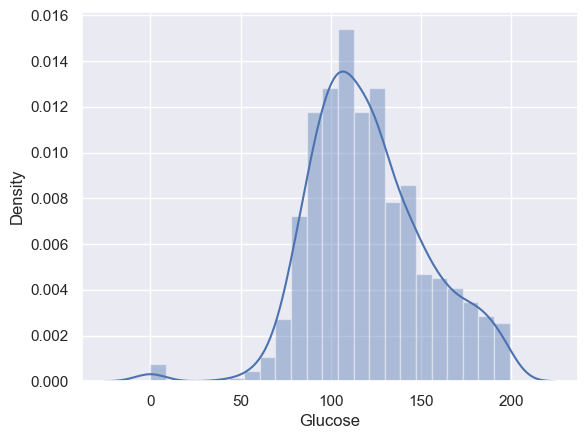

In [13]:
#Glucose
sns.distplot(df1['Glucose'])
plt.show()

In [14]:
df2 = df1[df1['Glucose']>0]

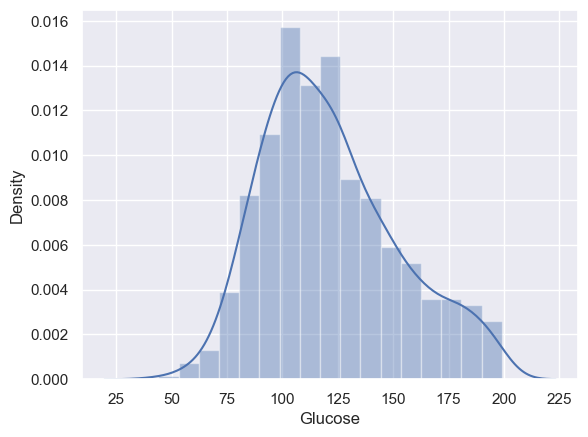

In [15]:
sns.distplot(df2['Glucose'])
plt.show()

In [16]:
df2.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   761.000000  761.000000     761.000000     761.000000  761.000000   
mean      3.819974  121.613666      69.110381      20.434954   80.208936   
std       3.320656   30.534545      19.424440      15.971316  115.597747   
min       0.000000   44.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   36.000000   
75%       6.000000  141.000000      80.000000      32.000000  129.000000   
max      14.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  761.000000                761.000000  761.000000  761.000000  
mean    31.968331                  0.472444   33.240473    0.346912  
std      7.894784                  0.331963   11.771788    0.476300  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.244000   24.000000    0.000000  
50%     32.000000                  0.374000   29.000000    0.000000  
75%     36.500000                  0.626000   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

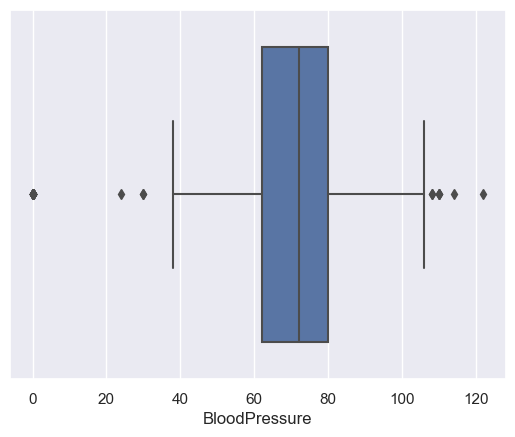

In [17]:
#bloodpressure
sns.boxplot(df2['BloodPressure'])
plt.show()

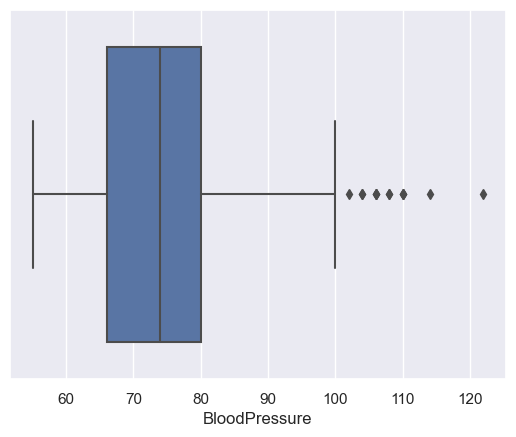

In [18]:
q = df2['BloodPressure'].quantile(0.1)
df3 = df2[df2['BloodPressure']>q]
sns.boxplot(df3['BloodPressure'])
plt.show()

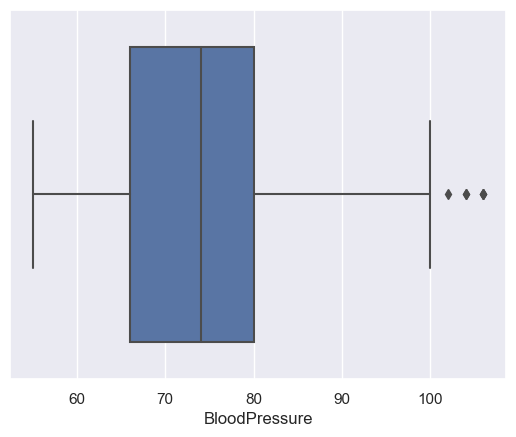

In [19]:
q = df3['BloodPressure'].quantile(0.99)
df4=df3[df3['BloodPressure']<q]
sns.boxplot(df4['BloodPressure'])
plt.show()

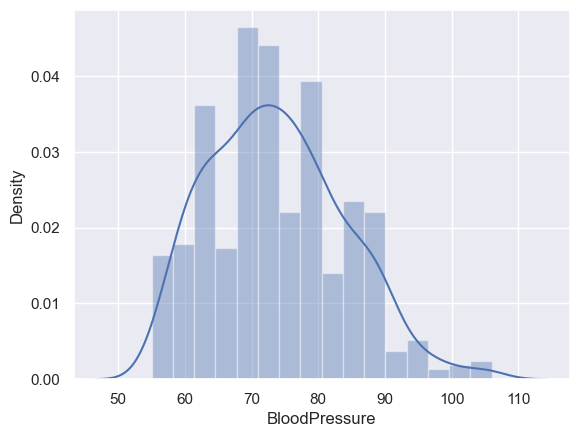

In [20]:
sns.distplot(df4['BloodPressure'])
plt.show()

In [21]:
df4.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   669.000000  669.000000     669.000000     669.000000  669.000000   
mean      3.923767  122.136024      73.801196      21.414051   83.056801   
std       3.344741   30.676324      10.181773      15.863013  117.566899   
min       0.000000   44.000000      55.000000       0.000000    0.000000   
25%       1.000000  100.000000      66.000000       0.000000    0.000000   
50%       3.000000  117.000000      74.000000      24.000000   43.000000   
75%       6.000000  142.000000      80.000000      33.000000  130.000000   
max      14.000000  199.000000     106.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  669.000000                669.000000  669.000000  669.000000  
mean    32.279970                  0.473798   33.733931    0.345291  
std      7.145093                  0.330308   11.885345    0.475819  
min      0.000000                  0.084000   21.000000    0.000000  
25%     27.500000                  0.245000   24.000000    0.000000  
50%     32.400000                  0.376000   30.000000    0.000000  
75%     36.600000                  0.619000   41.000000    1.000000  
max     59.400000                  2.420000   81.000000    1.000000

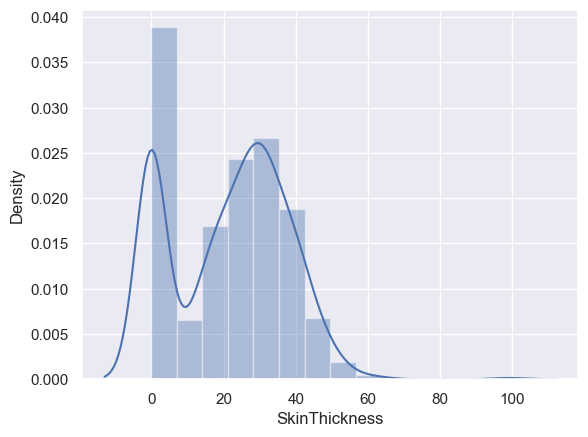

In [22]:
#SkinThickness
sns.distplot(df4['SkinThickness'])
plt.show()

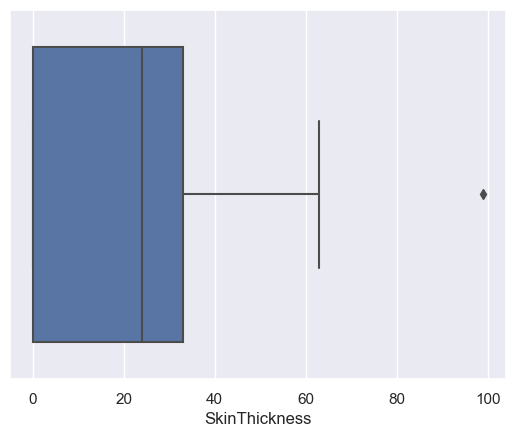

In [23]:
sns.boxplot(df4['SkinThickness'])
plt.show()

No need for manageing outlier

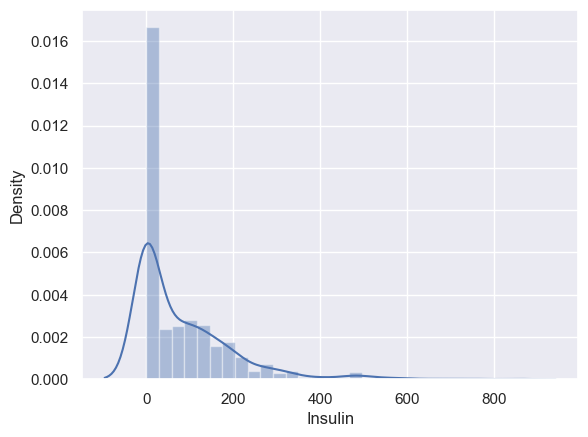

In [24]:
#insulin
sns.distplot(df4['Insulin'])
plt.show()

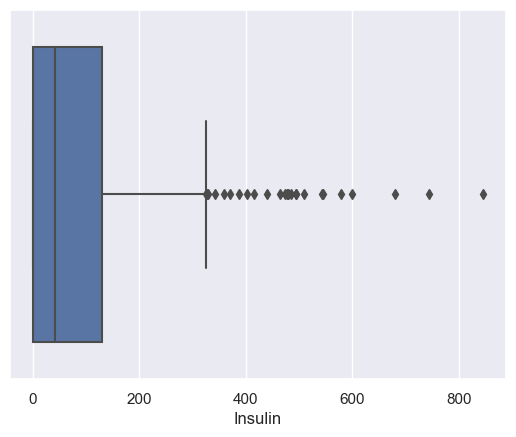

In [25]:
sns.boxplot(df4['Insulin'])
plt.show()

In [26]:
df5 = df4[df4['Insulin']>25]

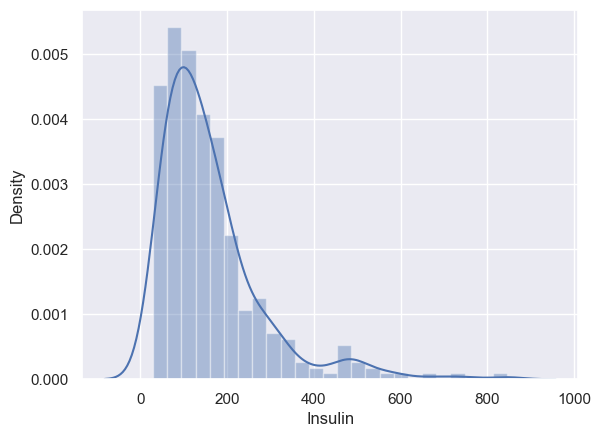

In [27]:
sns.distplot(df5['Insulin'])
plt.show()

In [28]:
df6 = df5[df5['Insulin']<300]

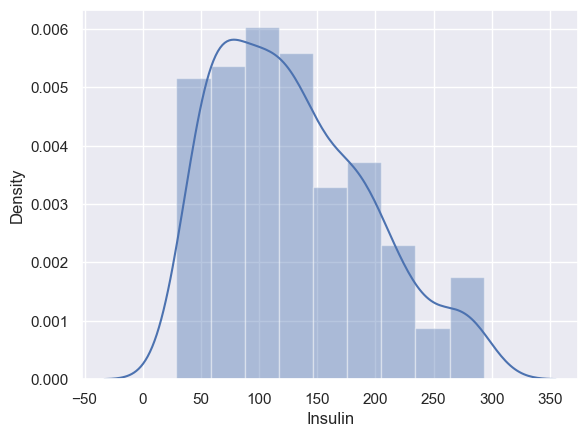

In [29]:
sns.distplot(df6['Insulin'])
plt.show()

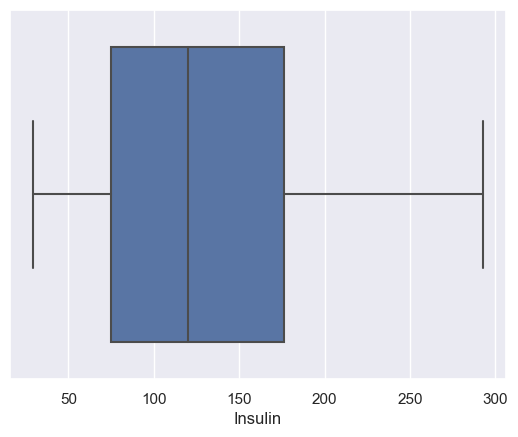

In [30]:
sns.boxplot(df6['Insulin'])
plt.show()

In [31]:
df6.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   311.000000  311.000000     311.000000     311.000000  311.000000   
mean      3.244373  119.852090      72.726688      28.974277  129.620579   
std       3.176236   29.025083      10.022518      10.372699   64.837843   
min       0.000000   56.000000      56.000000       7.000000   29.000000   
25%       1.000000   98.500000      64.000000      21.000000   75.000000   
50%       2.000000  117.000000      72.000000      29.000000  120.000000   
75%       5.000000  137.500000      80.000000      36.000000  176.000000   
max      14.000000  198.000000     106.000000      60.000000  293.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  311.000000                311.000000  311.000000  311.000000  
mean    32.707717                  0.508685   30.842444    0.305466  
std      6.838633                  0.305480   10.025014    0.461347  
min      0.000000                  0.085000   21.000000    0.000000  
25%     28.000000                  0.268500   23.000000    0.000000  
50%     33.100000                  0.444000   27.000000    0.000000  
75%     36.600000                  0.680000   36.000000    1.000000  
max     57.300000                  1.731000   81.000000    1.000000

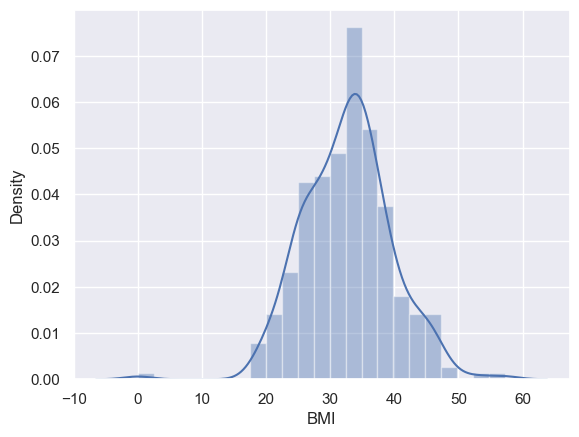

In [32]:
#BMI
sns.distplot(df6['BMI'])
plt.show()

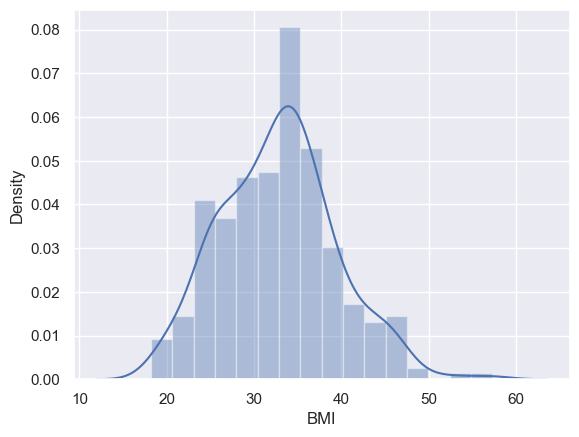

In [33]:
df7 = df6[df6['BMI']>15]
sns.distplot(df7['BMI'])
plt.show()

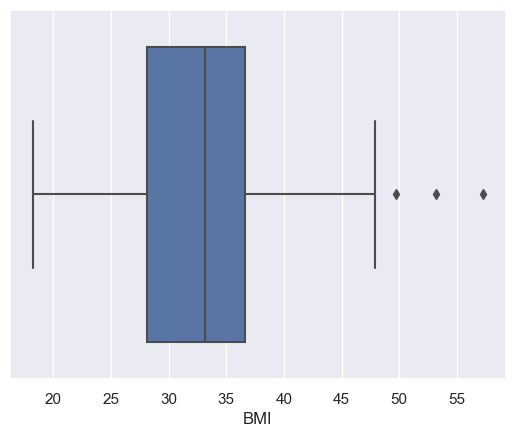

In [34]:
sns.boxplot(df7['BMI'])
plt.show()

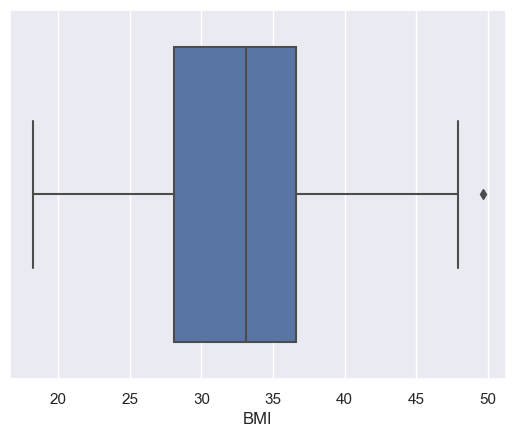

In [35]:
df8 = df7[df7['BMI']<50]
sns.boxplot(df8['BMI'])
plt.show()

In [36]:
data_cleaned = df8.reset_index(drop=True)
data_cleaned.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   308.000000  308.000000     308.000000     308.000000  308.000000   
mean      3.266234  119.711039      72.655844      28.886364  129.490260   
std       3.180851   29.066098       9.935872      10.296741   64.784961   
min       0.000000   56.000000      56.000000       7.000000   29.000000   
25%       1.000000   98.000000      64.000000      21.000000   75.000000   
50%       2.000000  116.500000      72.000000      29.000000  120.000000   
75%       5.000000  137.250000      80.000000      36.000000  176.000000   
max      14.000000  198.000000     106.000000      60.000000  293.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  308.000000                308.000000  308.000000  308.000000  
mean    32.667532                  0.502698   30.922078    0.305195  
std      6.356083                  0.297782   10.039682    0.461239  
min     18.200000                  0.085000   21.000000    0.000000  
25%     28.050000                  0.268000   23.000000    0.000000  
50%     33.100000                  0.441000   27.000000    0.000000  
75%     36.600000                  0.677250   36.000000    1.000000  
max     49.700000                  1.600000   81.000000    1.000000

In [37]:
data_cleaned.columns.values

array(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype=object)

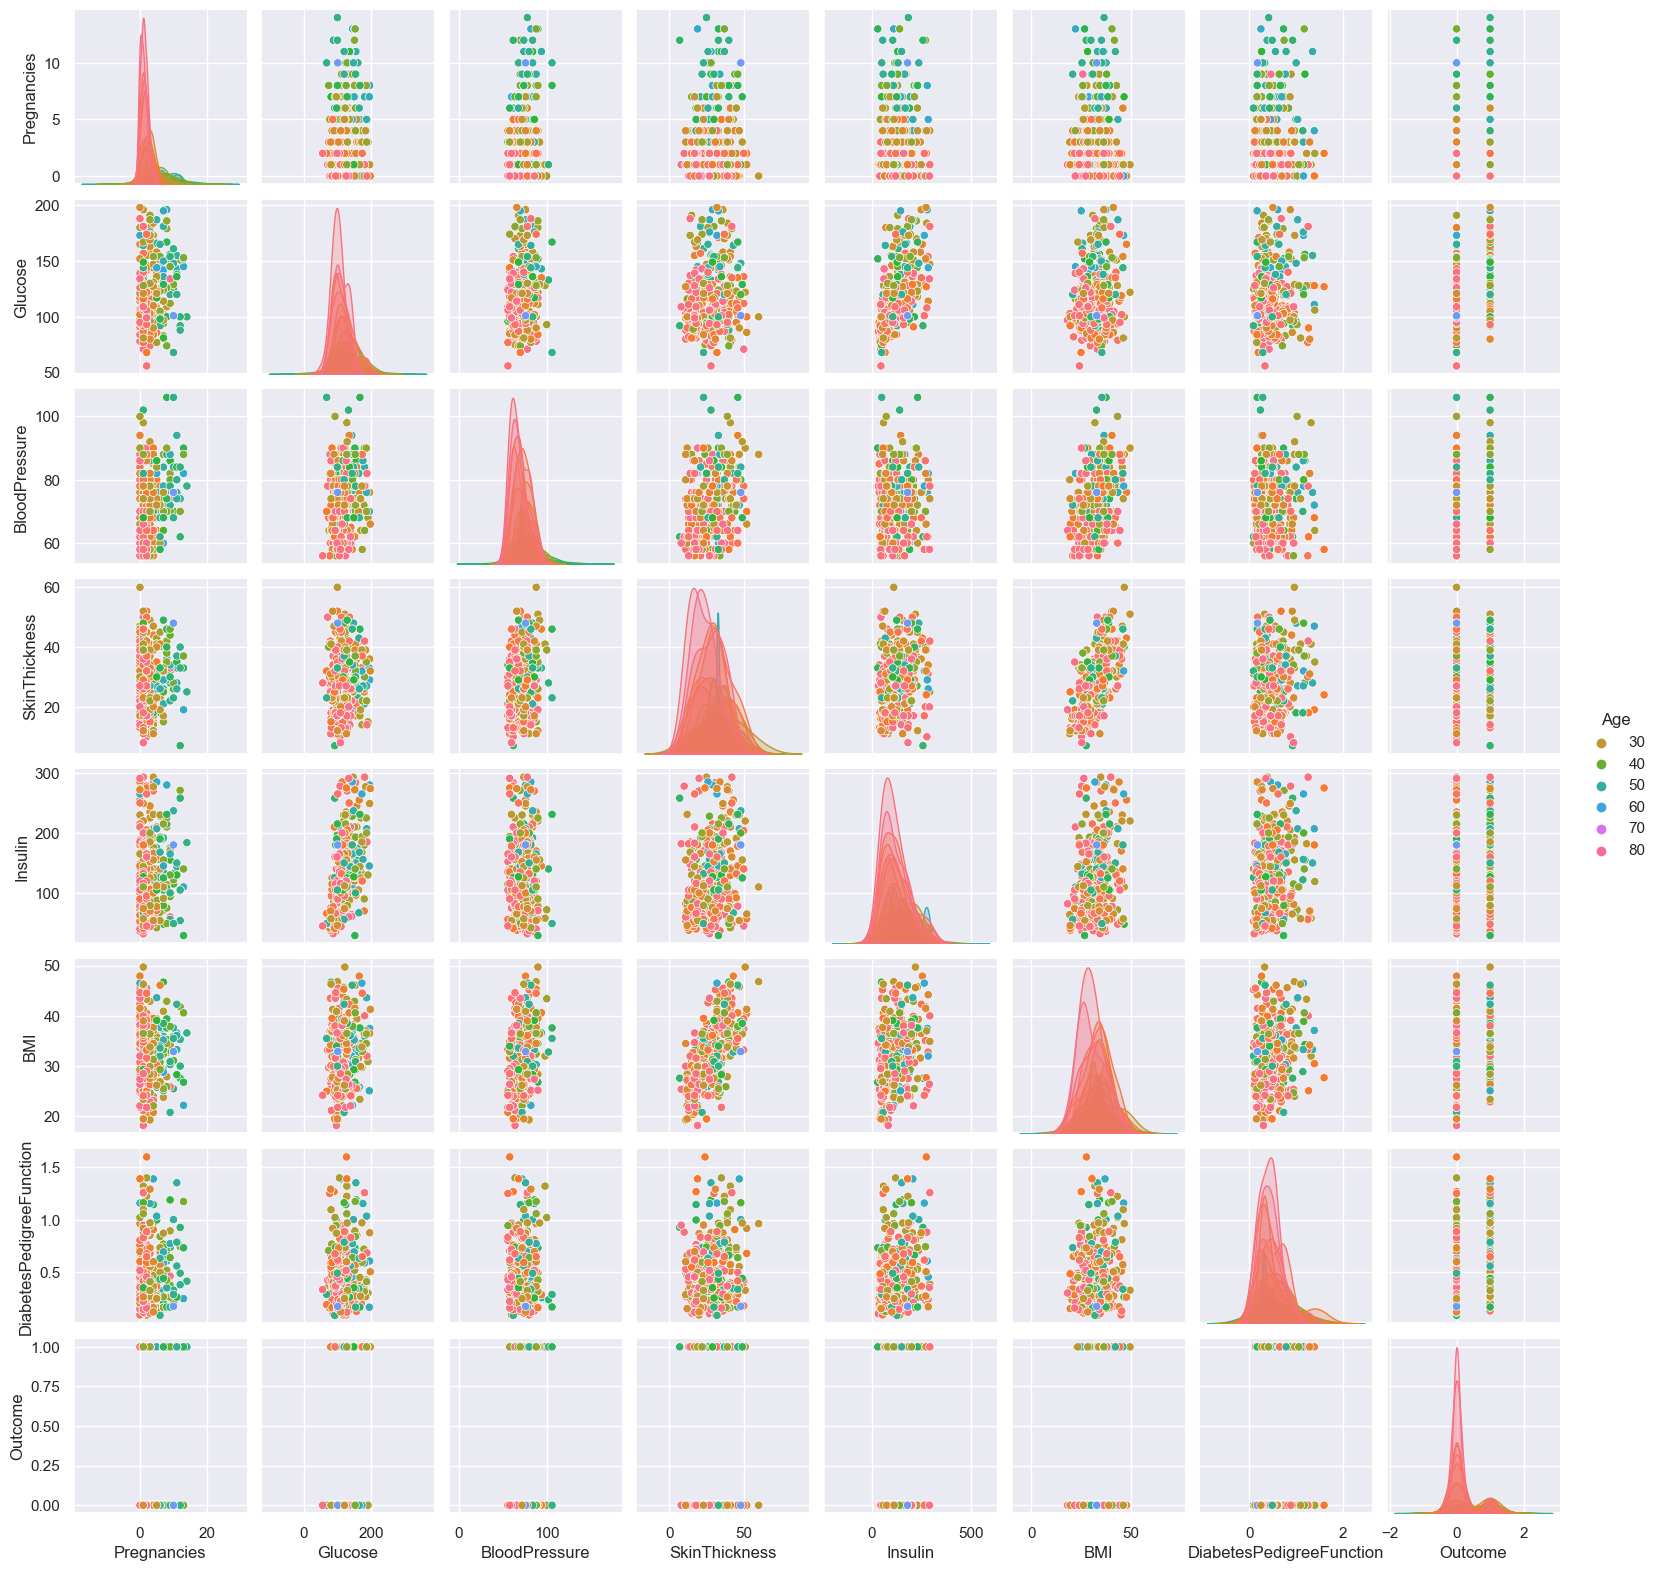

In [38]:
sns.pairplot(data_cleaned, hue='Age',palette="husl",size=2)
plt.show()

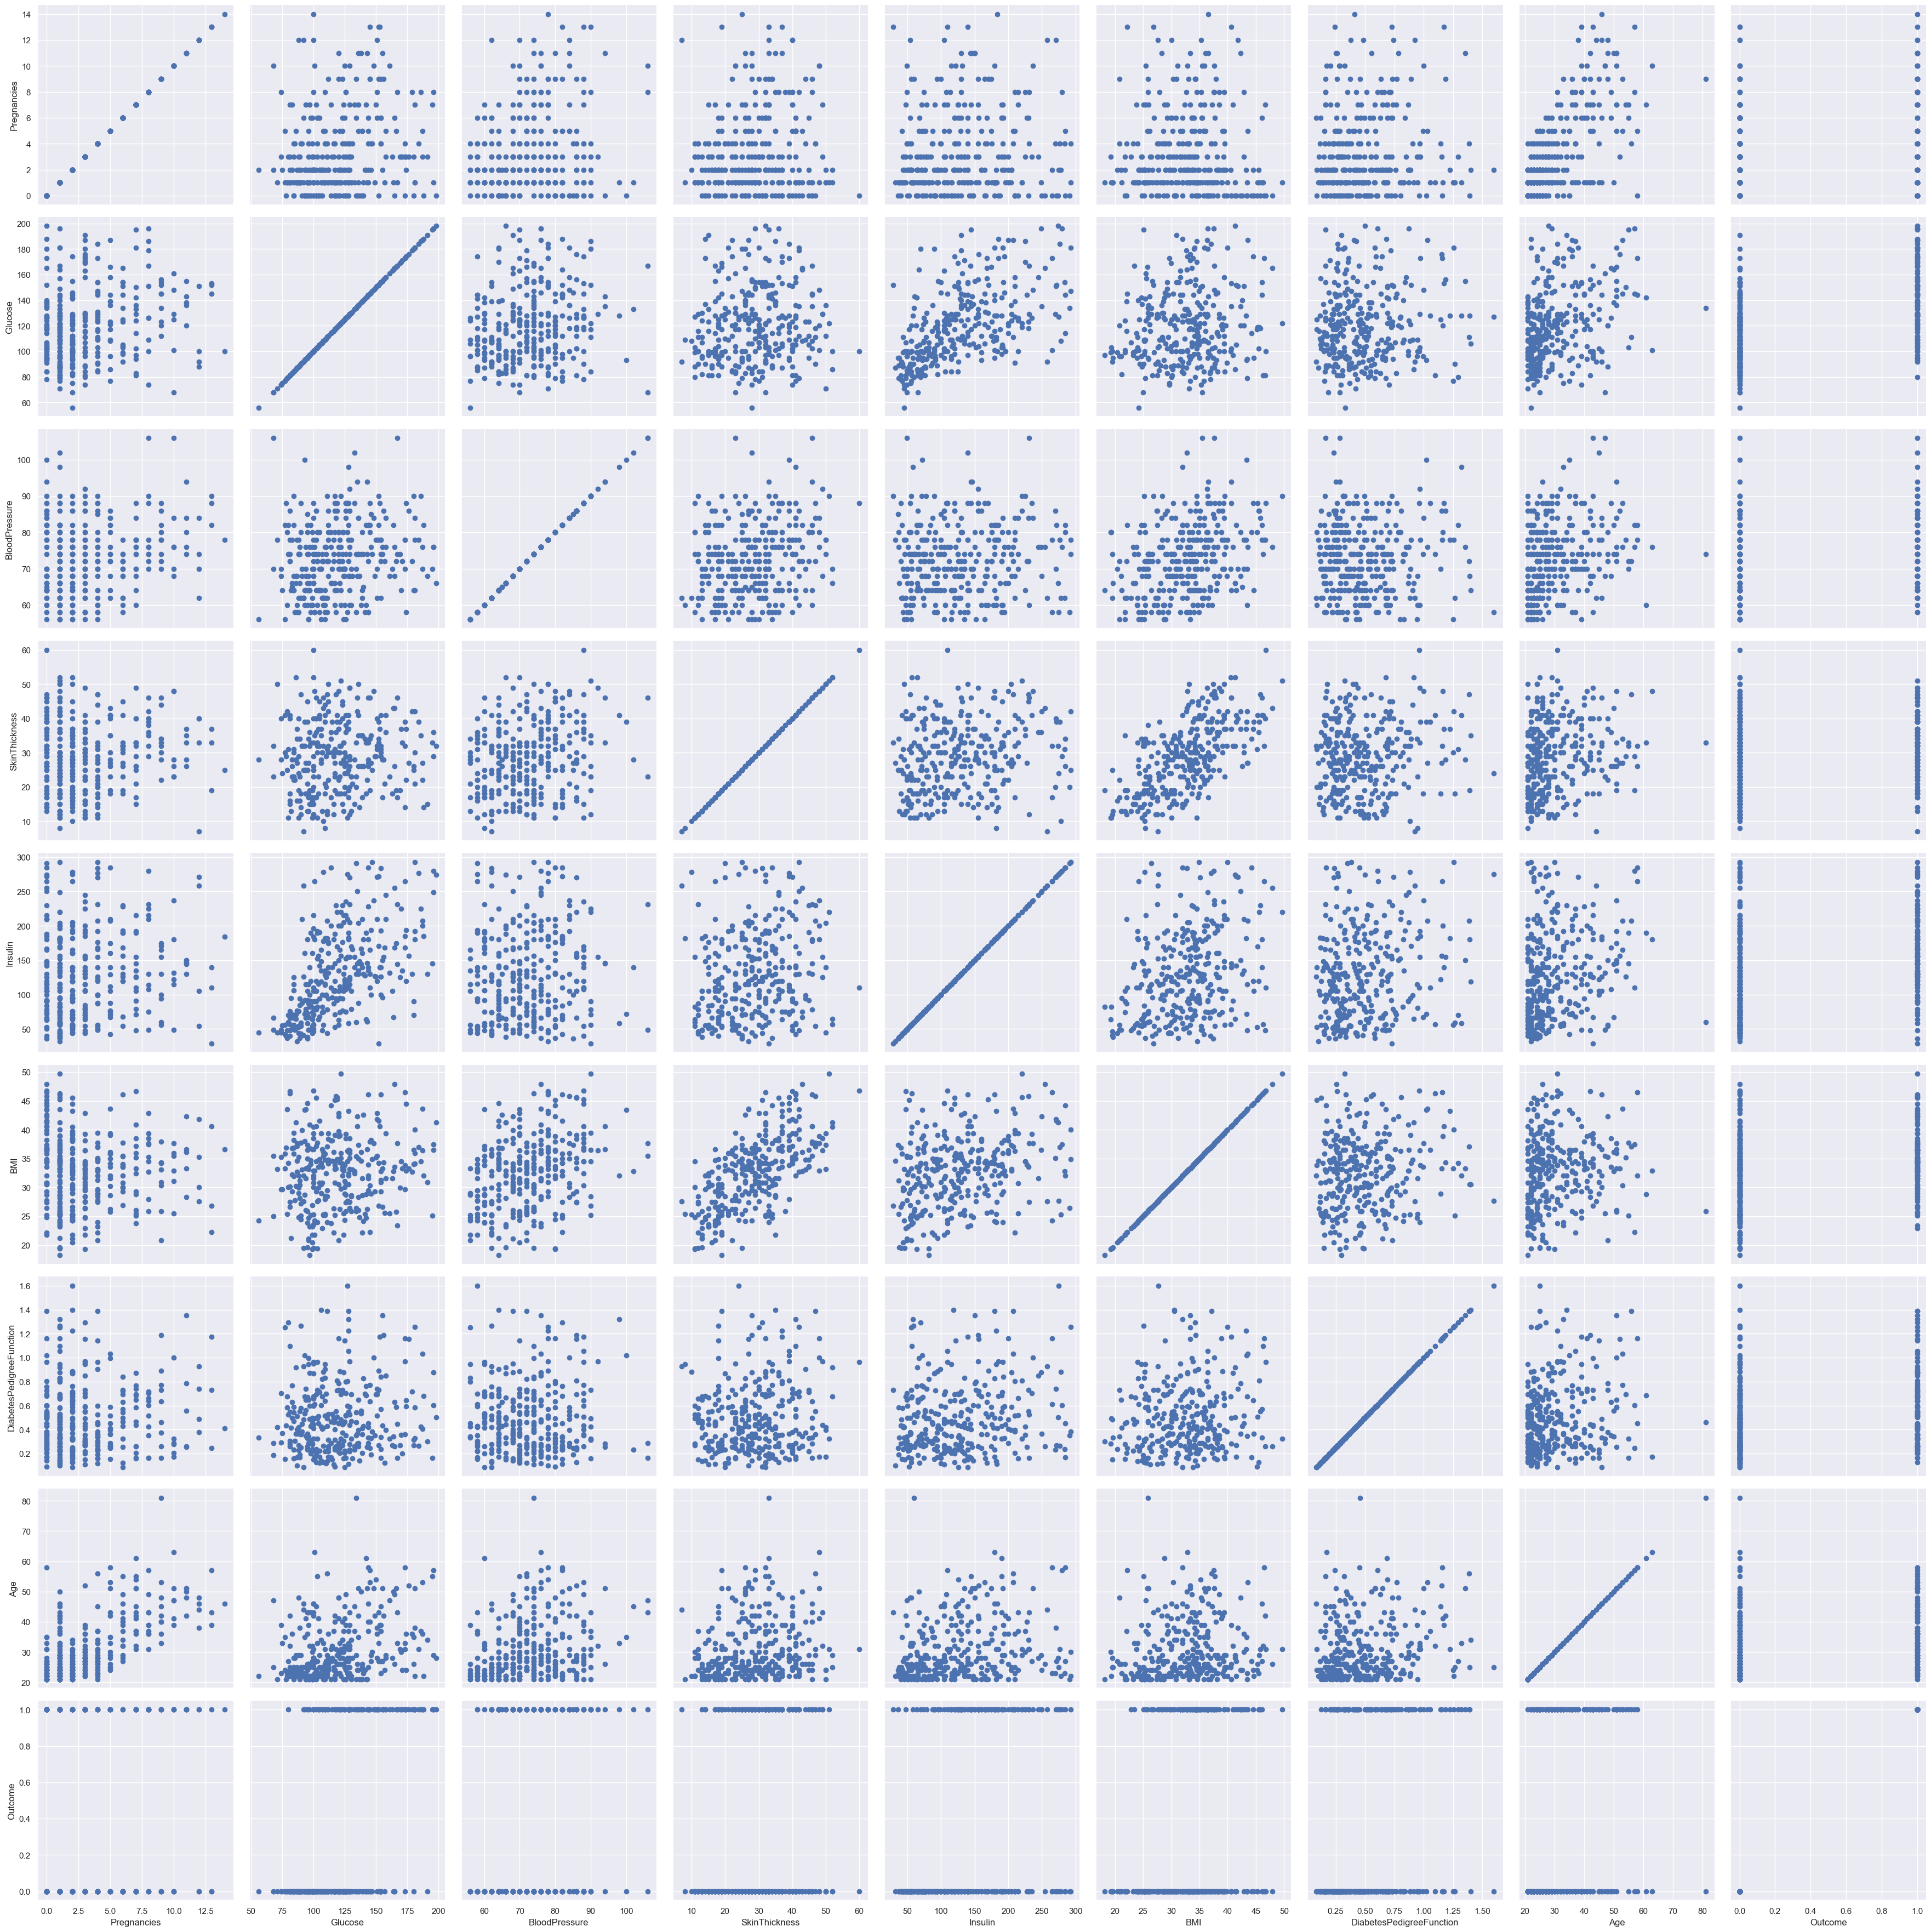

In [39]:
g = sns.PairGrid(data_cleaned,height=5, aspect=1 , size=4)
g = g.map(plt.scatter)
plt.show()

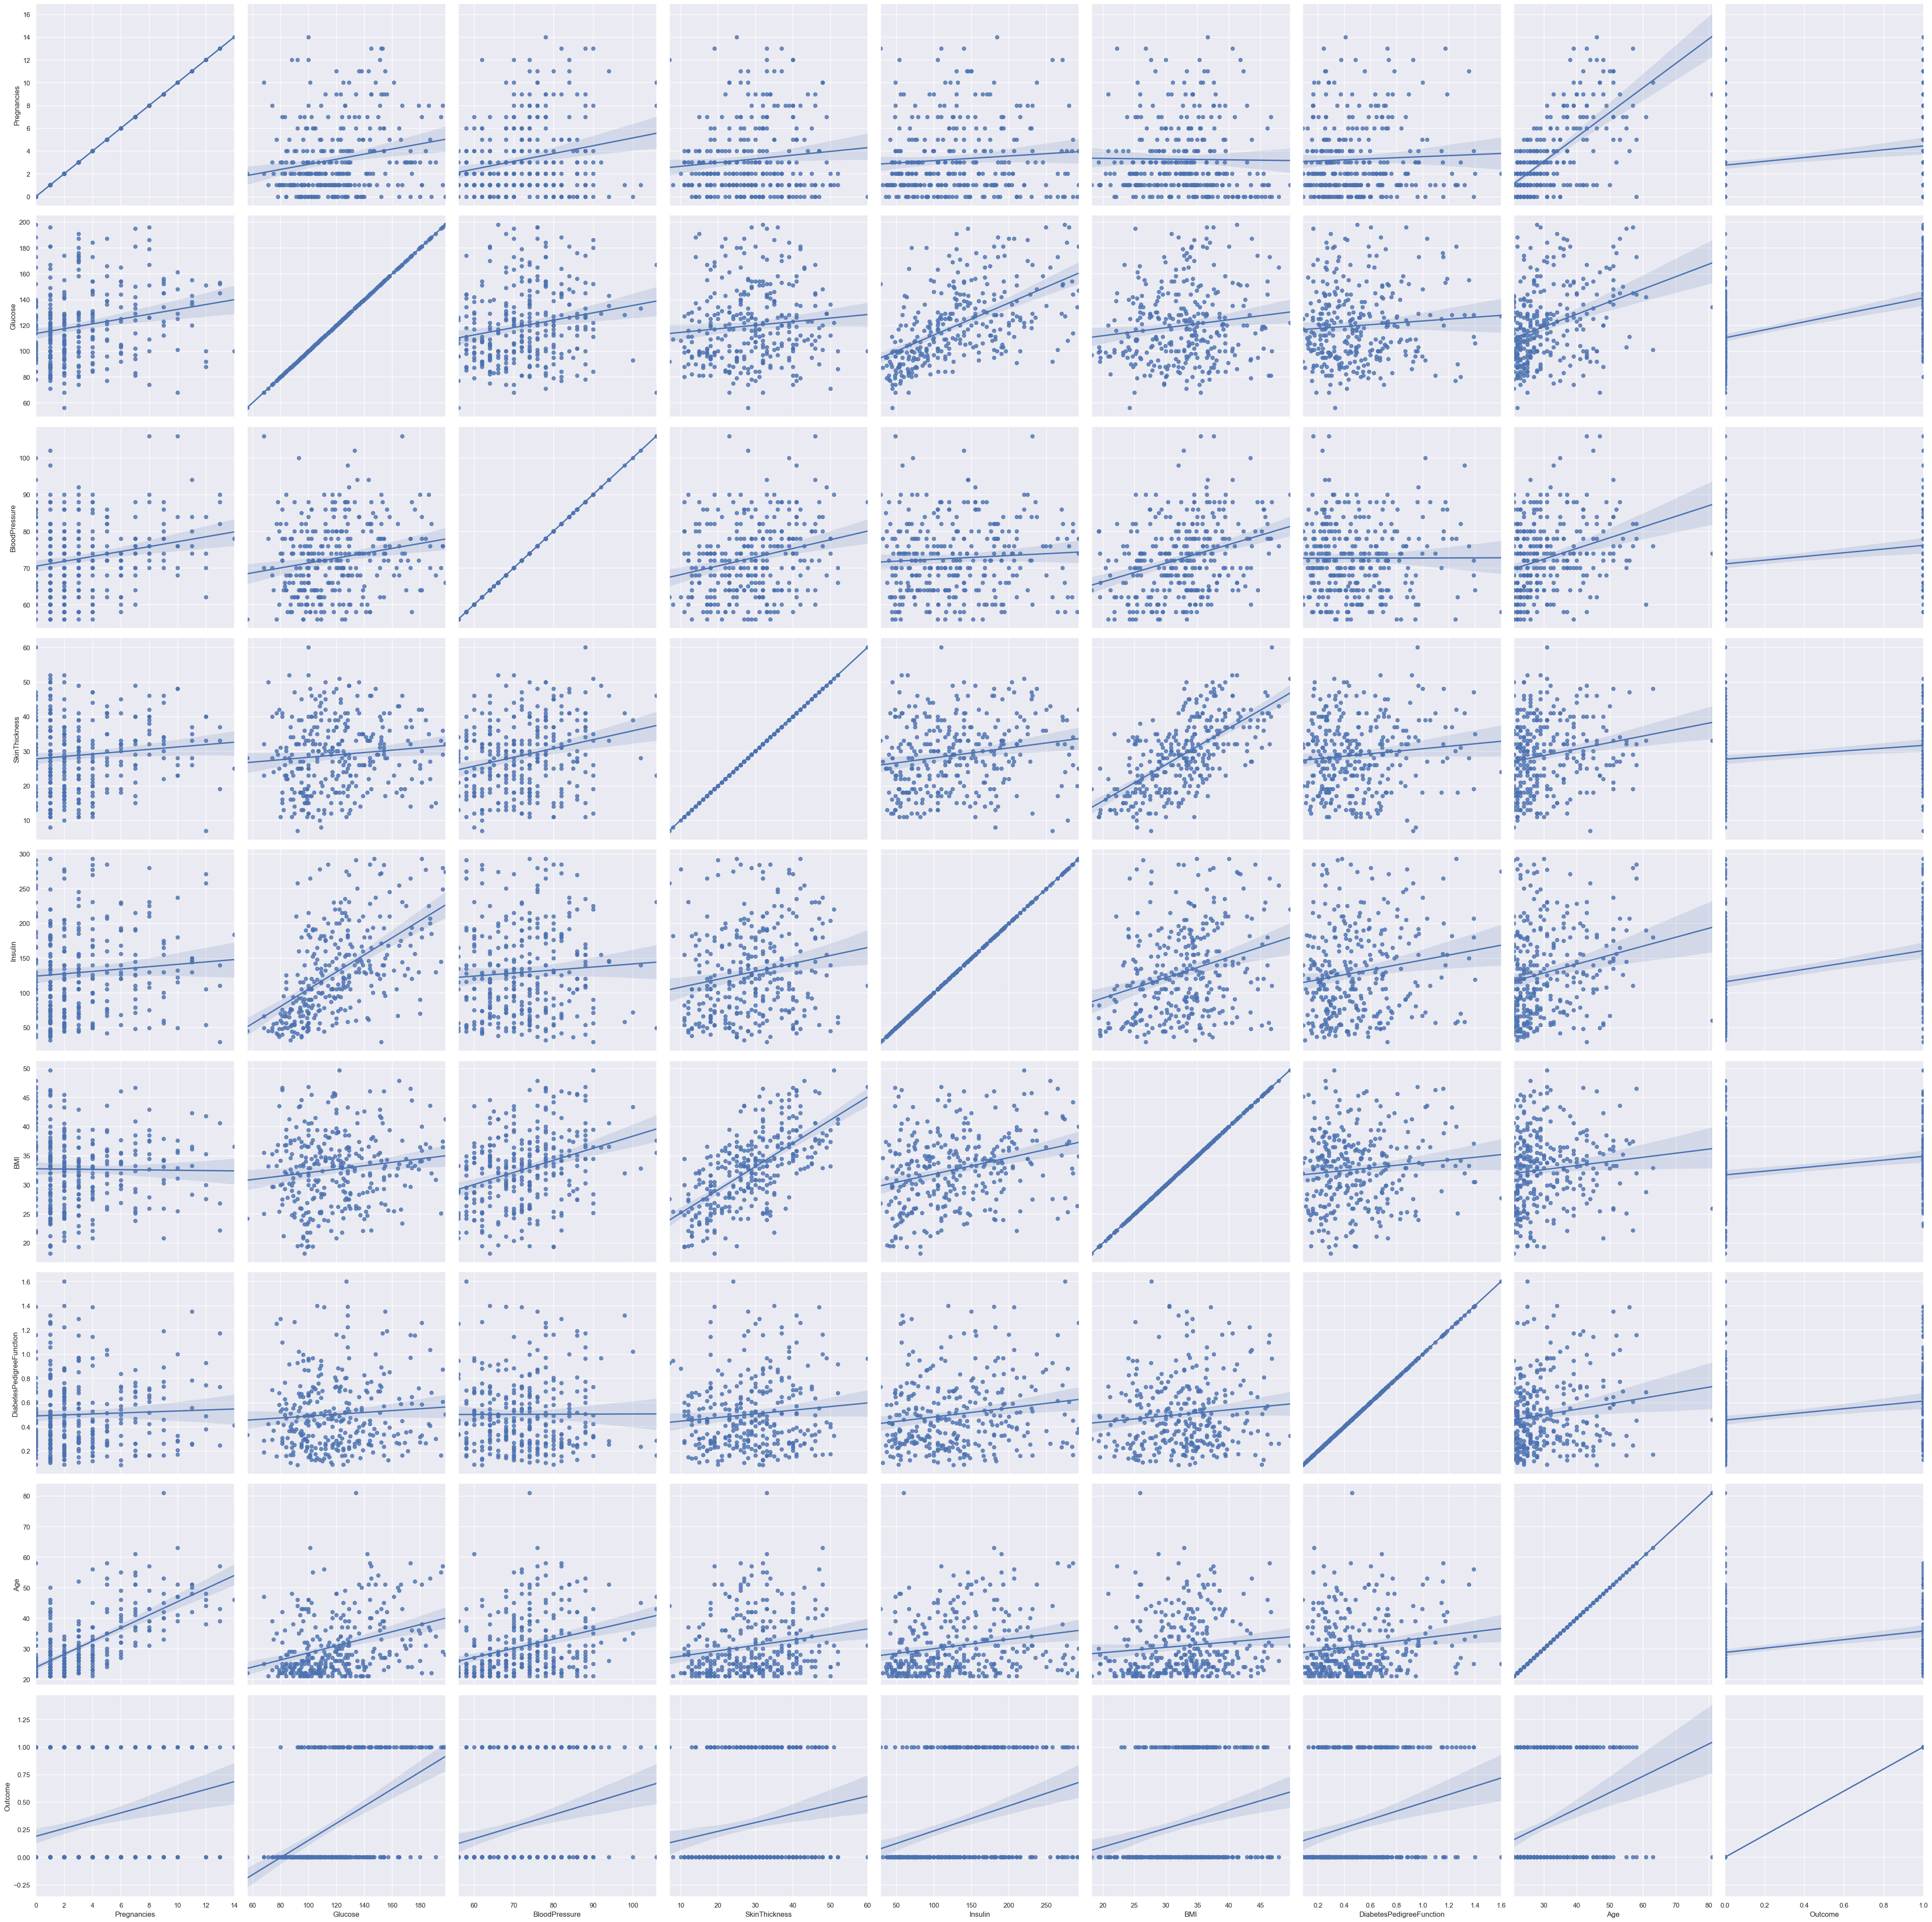

In [40]:
u = sns.PairGrid(data_cleaned,height=5, aspect=1)
u = u.map(sns.regplot)
plt.show()

## Characteristics of patients who suffer from diabetes

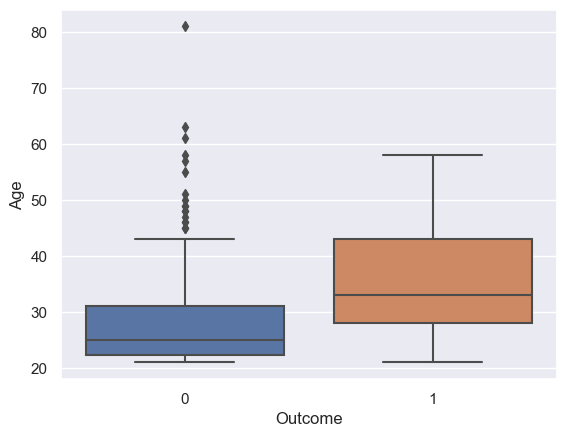

The Median age of the group 0 is: 25.0years
The Median age of the group 1 is: 33.0years


In [41]:
# age 
sns.boxplot(y='Age', x='Outcome', data=data_cleaned)
plt.show()


temp = data_cleaned.groupby('Outcome')['Age'].median().reset_index()
for idx in temp.index:
    print("The Median age of the group {} is: {}".format(idx,temp.iloc[idx]['Age']) + 'years')

 as we can see old people are more prone to diabetes

#BMI 
as we know in BMI there are categories

1 - Underweight (<18)

2 - Normal (18.5 - 24.9)

3 - Overweight (25 - 29.9)

4 - Obese (30 - 34.9)

5 - Extremely obese (>35)

In [42]:
bmi_category = []
for BMI in data_cleaned['BMI']:
    if BMI  < 18:
        bmi_category.append('Underweight')
    elif 18.1 <= BMI <= 24.9:
        bmi_category.append('Normal')
    elif 25 <= BMI <= 29.9:
        bmi_category.append('Overweight')
    elif 30 <= BMI <= 34.9:
        bmi_category.append('Obese')
    elif BMI > 34.9 :
        bmi_category.append('Extremely obese')
        
data_cleaned['BMI_category'] = bmi_category

In [43]:
display(data_cleaned.groupby(['BMI_category', 'Outcome'])['SkinThickness'].mean().reset_index())

BMI_category  Outcome  SkinThickness
0  Extremely obese        0      36.682540
1  Extremely obese        1      35.883721
2           Normal        0      18.151515
3           Normal        1      15.000000
4            Obese        0      28.000000
5            Obese        1      30.764706
6       Overweight        0      22.690909
7       Overweight        1      23.733333

In [44]:
temp = data_cleaned.groupby('Outcome')['BMI_category'].value_counts(normalize=True).reset_index(name="percentage")

In [45]:
temp

Outcome     BMI_category  percentage
0        0  Extremely obese    0.294393
1        0            Obese    0.294393
2        0       Overweight    0.257009
3        0           Normal    0.154206
4        1  Extremely obese    0.457447
5        1            Obese    0.361702
6        1       Overweight    0.159574
7        1           Normal    0.021277

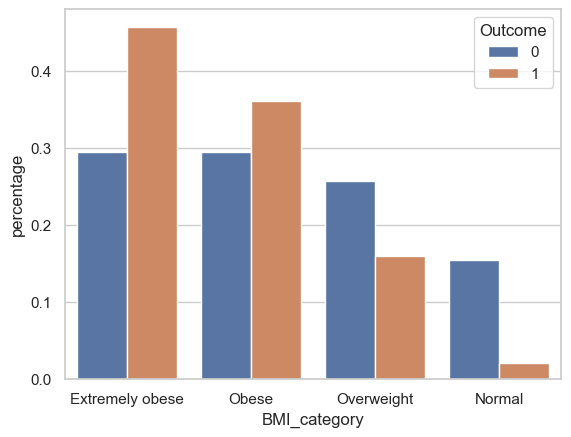

In [46]:
sns.set_style("whitegrid")
sns.barplot(x='BMI_category', y = 'percentage',hue ='Outcome',data=temp)
plt.show()

As we can see in the barplot, the BMI distribution across healthy patients is similar (19.8% - 27.8%). On the contrary, approximately 82 % of diabetic patients are obese or extremely obese based on their BMI.

# glucose 
According to the mayo clinic, 2 hours after an Oral Glucose Tolerance Test (OGTT)

1) Below: 140 mg/dL - Normal blood glucose

2) 140 and 199 mg/dL (Subjects at risk to onset diabetes) - Impaired Glucose metabolism:

3) 200 mg/dL or more - Diabetic

In [47]:
glucose_cat = []

for glucose in data_cleaned['Glucose']:
    if glucose < 99.75:
        glucose_cat.append('Hypoglycemia')
    elif 99 <= glucose <= 140.25:
        glucose_cat.append('Normoglycemia')
    elif glucose > 140.25:
        glucose_cat.append('Hyperglycemia')
        
data_cleaned['Glucose_category'] = glucose_cat

In [48]:
display(data_cleaned.groupby(['Glucose_category','Outcome'])['Insulin'].mean().reset_index())

Glucose_category  Outcome     Insulin
0    Hyperglycemia        0  160.240000
1    Hyperglycemia        1  179.777778
2     Hypoglycemia        0   72.615385
3     Hypoglycemia        1  132.500000
4    Normoglycemia        0  136.081081
5    Normoglycemia        1  144.720930

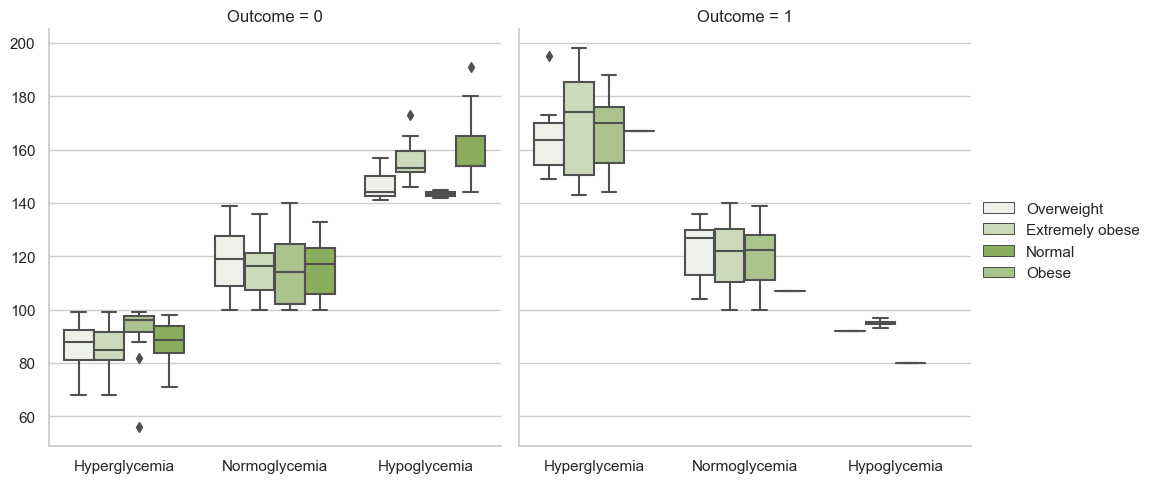

In [49]:
sns.set_style("whitegrid")
g = sns.FacetGrid(data_cleaned, col = 'Outcome', col_wrap=2, sharex = True,sharey=True , height=5)
g.map_dataframe(sns.boxplot, x="Glucose_category", y="Glucose", hue='BMI_category',color = '#8cba51')
g.add_legend()
plt.show()

## Some Processing

In [50]:
diabetes = data_cleaned.copy()
diabetes

Pregnancies  Glucose  BloodPressure  SkinThickness  ...  Age  Outcome  \
0              1       89             66             23  ...   21        0   
1              5      166             72             19  ...   51        1   
2              0      118             84             47  ...   31        1   
3              1      115             70             30  ...   32        1   
4              3      126             88             41  ...   27        0   
5             11      143             94             33  ...   51        1   
6             10      125             70             26  ...   41        1   
7              1       97             66             15  ...   22        0   
8             13      145             82             19  ...   57        0   
9              3      158             76             36  ...   28        1   
10             3       88             58             11  ...   22        0   
11             4      103             60             33  ...   33        0   
12             4      111             72             47  ...   56        1   
13             3      180             64             25  ...   26        0   
14             1      103             80             11  ...   22        0   
15             0      100             88             60  ...   31        0   
16             0      105             64             41  ...   22        0   
17             2      141             58             34  ...   24        0   
18             1       95             66             13  ...   25        0   
19             4      146             85             27  ...   27        0   
20             2      100             66             20  ...   28        1   
21             5      139             64             35  ...   26        0   
22             4      129             86             20  ...   23        0   
23             7       83             78             26  ...   36        0   
24             2      110             74             29  ...   27        0   
25             2      100             68             25  ...   26        0   
26             4      123             80             15  ...   34        0   
27             7       81             78             40  ...   42        0   
28             2      142             82             18  ...   21        0   
29             6      144             72             27  ...   40        0   
30             1      122             90             51  ...   31        1   
31             1       81             72             18  ...   24        0   
32             1      126             56             29  ...   21        0   
33             4      144             58             28  ...   37        0   
34             0       95             85             25  ...   24        1   
35             3      171             72             33  ...   24        1   
36             1       89             76             34  ...   23        0   
37             4       99             76             15  ...   21        0   
38             2      107             74             30  ...   23        0   
39             3      120             70             30  ...   30        0   
40             1      118             58             36  ...   23        0   
41             1      117             88             24  ...   40        1   
42             4      173             70             14  ...   33        1   
43             3      170             64             37  ...   30        1   
44             2       96             68             13  ...   26        0   
45             2      125             60             20  ...   31        0   
46             0      100             70             26  ...   21        0   
47             0       93             60             25  ...   22        0   
48             4      154             62             31  ...   23        0   
49             2      106             64             35  ...   34        0   
50             1      136  

In [51]:
from sklearn.preprocessing import (StandardScaler,LabelEncoder)

In [52]:
# Defining Target variable
target_col = ["Outcome"] # 0 = Healthy and 1 = Diabetes

# Defining categorical variables
print(diabetes.nunique()[diabetes.nunique() <= 17].keys().tolist())
cat_cols   = diabetes.nunique()[diabetes.nunique() < 17].keys().tolist()

# numerical columns
num_cols   = [x for x in diabetes.columns if x not in cat_cols + target_col]

# Binary columns
bin_cols   = diabetes.nunique()[diabetes.nunique() == 2].keys().tolist()

#Columns with more than 2 categories
multi_cols = [i for i in cat_cols if i not in bin_cols]

# ENCODING CATEGORICAL FEATURES

# Label encoding Binary columns
le = LabelEncoder()
for i in bin_cols :
    diabetes[i] = le.fit_transform(diabetes[i])
    
# Duplicating columns for multi value columns
diabetes = pd.get_dummies(data = diabetes,columns = multi_cols)

['Pregnancies', 'Outcome', 'BMI_category', 'Glucose_category']


In [53]:
std = StandardScaler()
scaled = std.fit_transform(diabetes[num_cols])
scaled = pd.DataFrame(scaled, columns=num_cols)

df_data_org = diabetes.copy()
diabetes = diabetes.drop(columns = num_cols, axis=1)
diabetes = diabetes.merge(scaled,left_index=True,right_index=True,how="left")

In [54]:
pd.set_option('display.max_rows', 309)
pd.set_option('display.max_columns', 30)

df_data_org

Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0         89             66             23       94  28.1   
1        166             72             19      175  25.8   
2        118             84             47      230  45.8   
3        115             70             30       96  34.6   
4        126             88             41      235  39.3   
5        143             94             33      146  36.6   
6        125             70             26      115  31.1   
7         97             66             15      140  23.2   
8        145             82             19      110  22.2   
9        158             76             36      245  31.6   
10        88             58             11       54  24.8   
11       103             60             33      192  24.0   
12       111             72             47      207  37.1   
13       180             64             25       70  34.0   
14       103             80             11       82  19.4   
15       100             88             60      110  46.8   
16       105             64             41      142  41.5   
17       141             58             34      128  25.4   
18        95             66             13       38  19.6   
19       146             85             27      100  28.9   
20       100             66             20       90  32.9   
21       139             64             35      140  28.6   
22       129             86             20      270  35.1   
23        83             78             26       71  29.3   
24       110             74             29      125  32.4   
25       100             68             25       71  38.5   
26       123             80             15      176  32.0   
27        81             78             40       48  46.7   
28       142             82             18       64  24.7   
29       144             72             27      228  33.9   
30       122             90             51      220  49.7   
31        81             72             18       40  26.6   
32       126             56             29      152  28.7   
33       144             58             28      140  29.5   
34        95             85             25       36  37.4   
35       171             72             33      135  33.3   
36        89             76             34       37  31.2   
37        99             76             15       51  23.2   
38       107             74             30      100  33.6   
39       120             70             30      135  42.9   
40       118             58             36       94  33.3   
41       117             88             24      145  34.5   
42       173             70             14      168  29.7   
43       170             64             37      225  34.5   
44        96             68             13       49  21.1   
45       125             60             20      140  33.8   
46       100             70             26       50  30.8   
47        93             60             25       92  28.7   
48       154             62             31      284  32.8   
49       106             64             35      119  30.5   
50       136             74             50      204  37.4   
51       156             86             28      155  34.3   
52       109             56             21      135  25.2   
53        88             74             19       53  29.0   
54       102             74             40      105  37.2   
55       114             80             34      285  44.2   
56       104             74             18      156  29.9   
57       111             90             12       78  28.4   
58       134             70             23      130  35.4   
59        79             60             42       48  43.5   
60        75             64             24       55  29.7   
61       179             72             42      130  32.7   
62       119             64             18       92  34.9   
63       128             98             41       58  32.0   
64       109             76             

In [55]:
df_data_org.shape

(308, 30)

In [56]:
df_data_org.columns

Index(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'Outcome', 'Pregnancies_0',
       'Pregnancies_1', 'Pregnancies_2', 'Pregnancies_3', 'Pregnancies_4',
       'Pregnancies_5', 'Pregnancies_6', 'Pregnancies_7', 'Pregnancies_8',
       'Pregnancies_9', 'Pregnancies_10', 'Pregnancies_11', 'Pregnancies_12',
       'Pregnancies_13', 'Pregnancies_14', 'BMI_category_Extremely obese',
       'BMI_category_Normal', 'BMI_category_Obese', 'BMI_category_Overweight',
       'Glucose_category_Hyperglycemia', 'Glucose_category_Hypoglycemia',
       'Glucose_category_Normoglycemia'],
      dtype='object')

In [88]:
#drop the changes
diabetes_to_drop = ['BMI_category_Extremely obese',
       'BMI_category_Normal', 'BMI_category_Obese', 'BMI_category_Overweight',
       'Glucose_category_Hyperglycemia', 'Glucose_category_Hypoglycemia',
       'Glucose_category_Normoglycemia']
                    
diabetes1 = df_data_org.drop(diabetes_to_drop,1)
diabetes1

Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0         89             66             23       94  28.1   
1        166             72             19      175  25.8   
2        118             84             47      230  45.8   
3        115             70             30       96  34.6   
4        126             88             41      235  39.3   
5        143             94             33      146  36.6   
6        125             70             26      115  31.1   
7         97             66             15      140  23.2   
8        145             82             19      110  22.2   
9        158             76             36      245  31.6   
10        88             58             11       54  24.8   
11       103             60             33      192  24.0   
12       111             72             47      207  37.1   
13       180             64             25       70  34.0   
14       103             80             11       82  19.4   
15       100             88             60      110  46.8   
16       105             64             41      142  41.5   
17       141             58             34      128  25.4   
18        95             66             13       38  19.6   
19       146             85             27      100  28.9   
20       100             66             20       90  32.9   
21       139             64             35      140  28.6   
22       129             86             20      270  35.1   
23        83             78             26       71  29.3   
24       110             74             29      125  32.4   
25       100             68             25       71  38.5   
26       123             80             15      176  32.0   
27        81             78             40       48  46.7   
28       142             82             18       64  24.7   
29       144             72             27      228  33.9   
30       122             90             51      220  49.7   
31        81             72             18       40  26.6   
32       126             56             29      152  28.7   
33       144             58             28      140  29.5   
34        95             85             25       36  37.4   
35       171             72             33      135  33.3   
36        89             76             34       37  31.2   
37        99             76             15       51  23.2   
38       107             74             30      100  33.6   
39       120             70             30      135  42.9   
40       118             58             36       94  33.3   
41       117             88             24      145  34.5   
42       173             70             14      168  29.7   
43       170             64             37      225  34.5   
44        96             68             13       49  21.1   
45       125             60             20      140  33.8   
46       100             70             26       50  30.8   
47        93             60             25       92  28.7   
48       154             62             31      284  32.8   
49       106             64             35      119  30.5   
50       136             74             50      204  37.4   
51       156             86             28      155  34.3   
52       109             56             21      135  25.2   
53        88             74             19       53  29.0   
54       102             74             40      105  37.2   
55       114             80             34      285  44.2   
56       104             74             18      156  29.9   
57       111             90             12       78  28.4   
58       134             70             23      130  35.4   
59        79             60             42       48  43.5   
60        75             64             24       55  29.7   
61       179             72             42      130  32.7   
62       119             64             18       92  34.9   
63       128             98             41       58  32.0   
64       109             76             

In [58]:
diabetes1.shape

(308, 23)

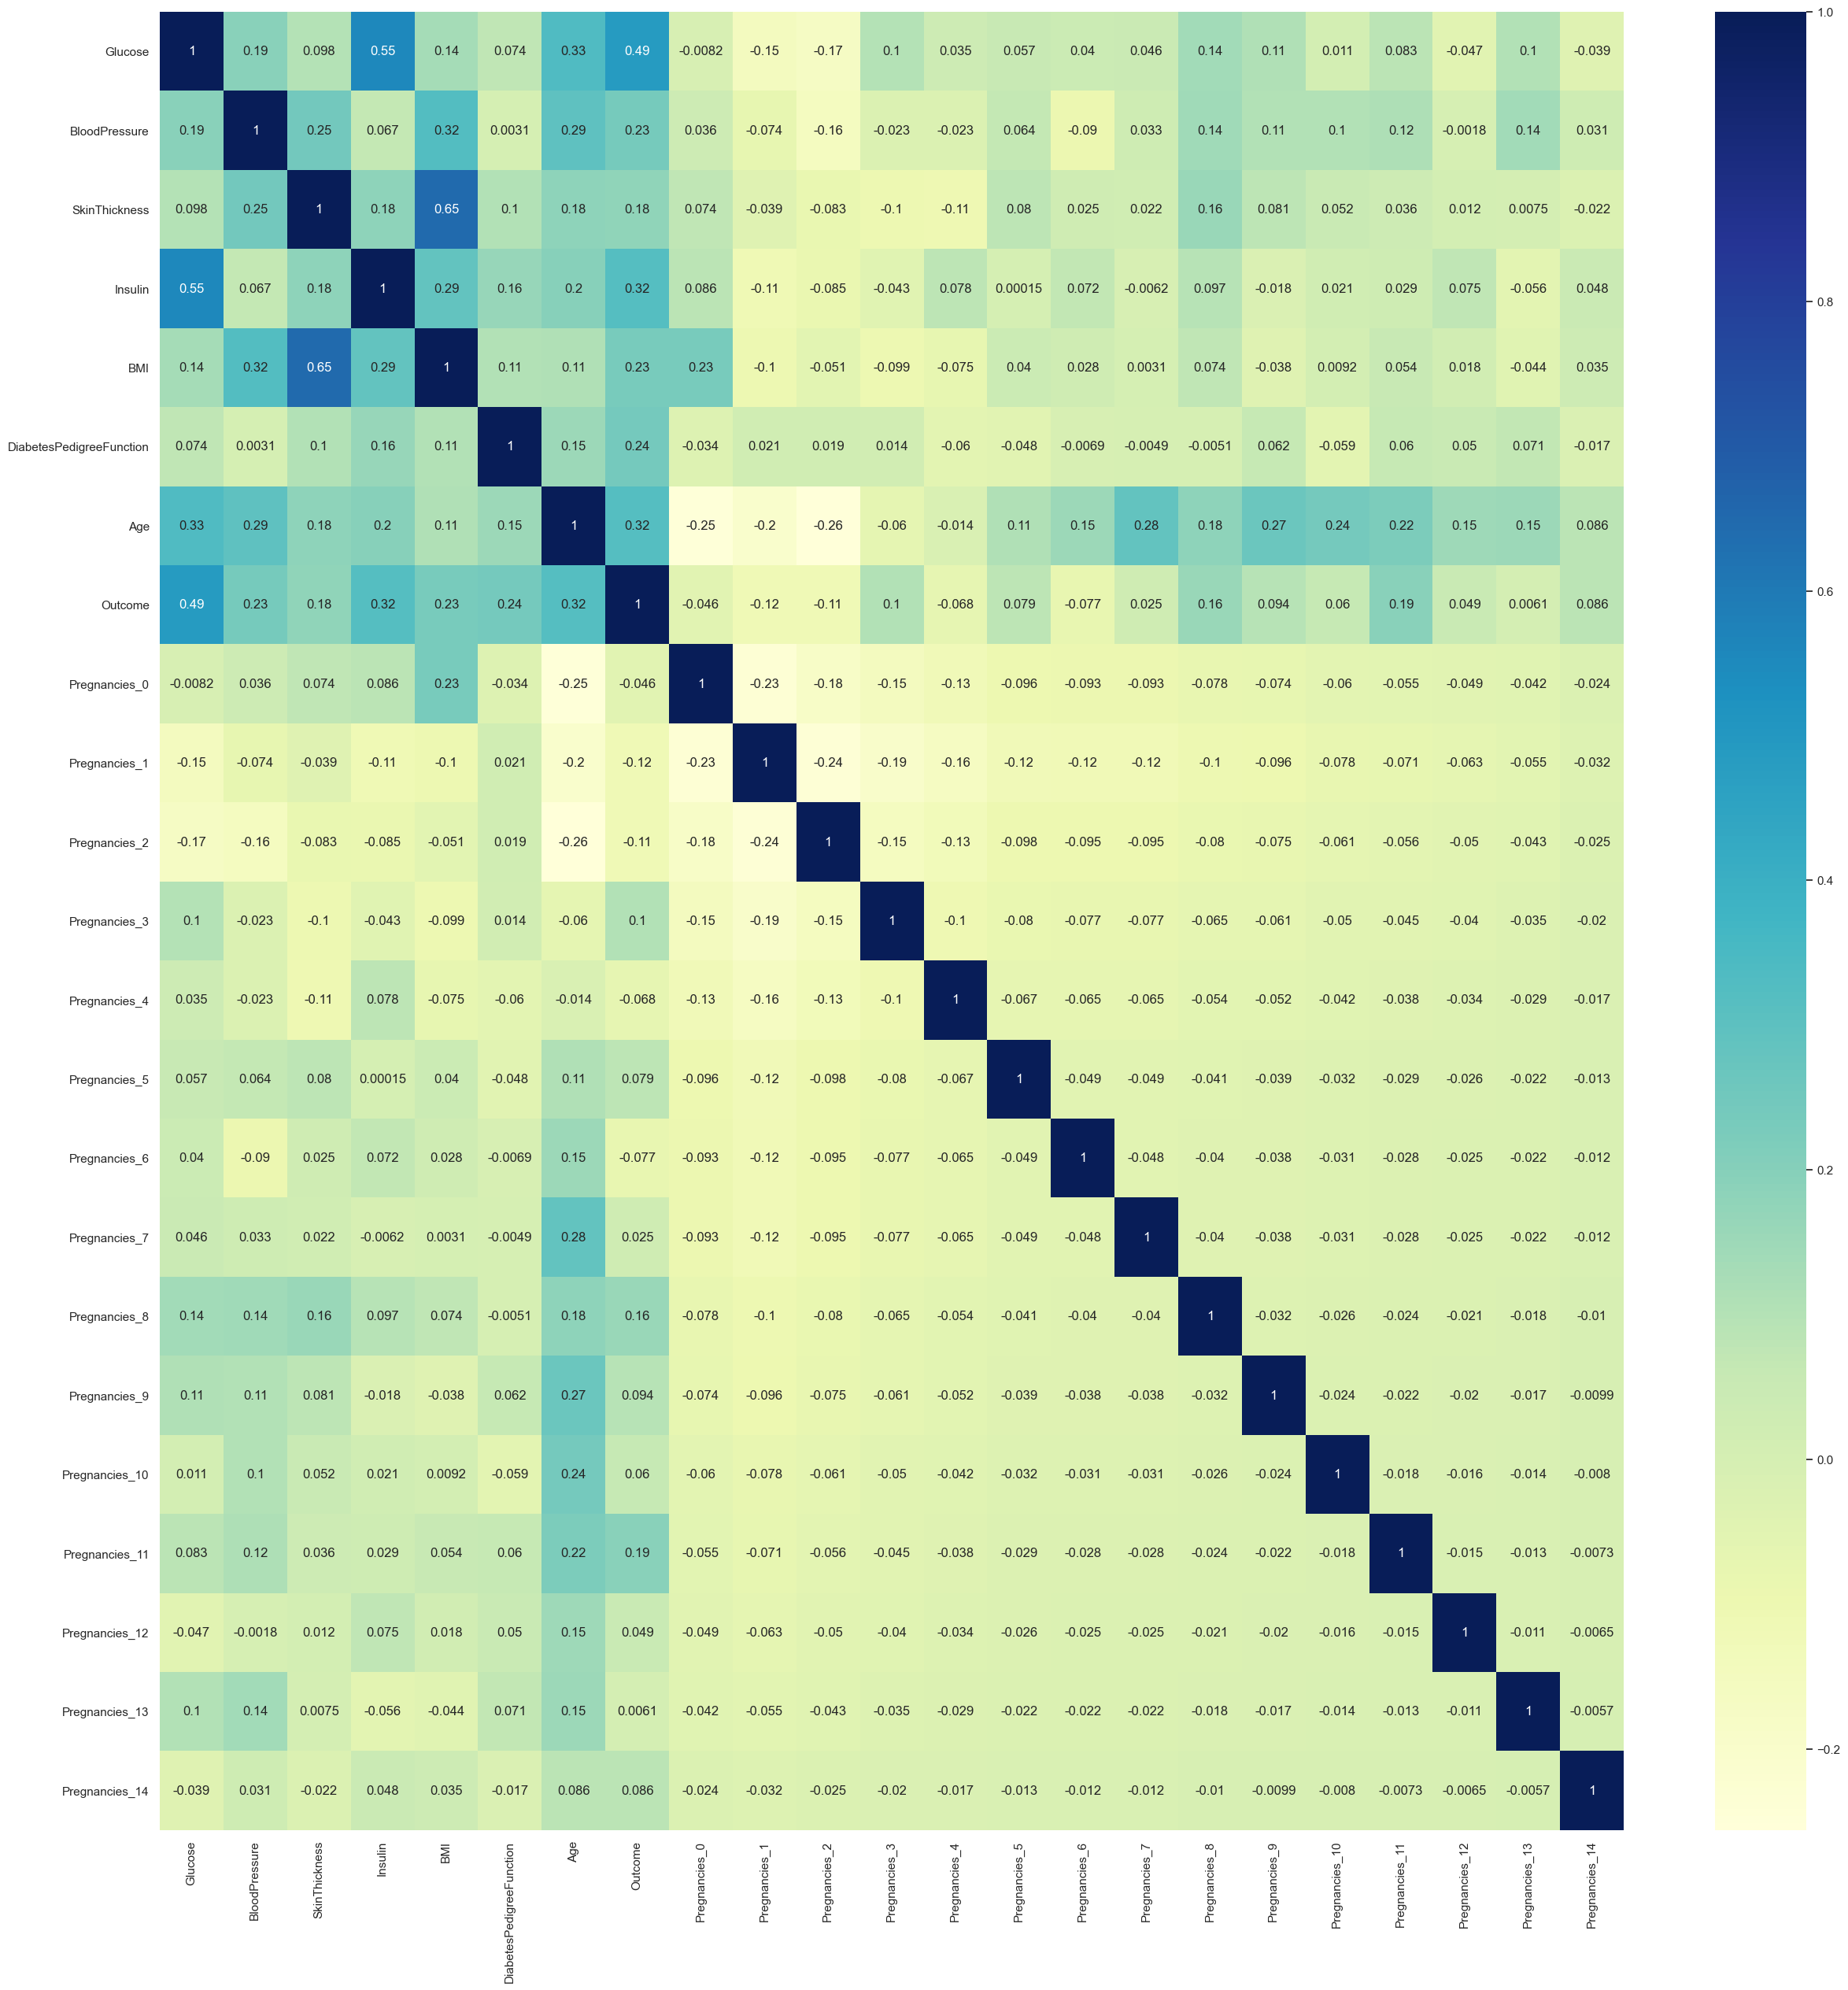

In [59]:
figure = plt.figure(figsize=(30,30))

sns.heatmap(diabetes1.corr(), data=diabetes1 , annot=True , cmap = "YlGnBu" )
plt.show()

In [60]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [61]:
variables = diabetes1[['BMI','Insulin','Glucose','Outcome',]]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]
vif['Features']=variables.columns
vif

VIF Features
0  13.232540      BMI
1   7.363586  Insulin
2  18.358663  Glucose
3   1.718611  Outcome

In [62]:
data_no_coll = diabetes1.drop(['Glucose'],axis=1)
data_no_coll

BloodPressure  SkinThickness  Insulin   BMI  DiabetesPedigreeFunction  \
0               66             23       94  28.1                     0.167   
1               72             19      175  25.8                     0.587   
2               84             47      230  45.8                     0.551   
3               70             30       96  34.6                     0.529   
4               88             41      235  39.3                     0.704   
5               94             33      146  36.6                     0.254   
6               70             26      115  31.1                     0.205   
7               66             15      140  23.2                     0.487   
8               82             19      110  22.2                     0.245   
9               76             36      245  31.6                     0.851   
10              58             11       54  24.8                     0.267   
11              60             33      192  24.0                     0.966   
12              72             47      207  37.1                     1.390   
13              64             25       70  34.0                     0.271   
14              80             11       82  19.4                     0.491   
15              88             60      110  46.8                     0.962   
16              64             41      142  41.5                     0.173   
17              58             34      128  25.4                     0.699   
18              66             13       38  19.6                     0.334   
19              85             27      100  28.9                     0.189   
20              66             20       90  32.9                     0.867   
21              64             35      140  28.6                     0.411   
22              86             20      270  35.1                     0.231   
23              78             26       71  29.3                     0.767   
24              74             29      125  32.4                     0.698   
25              68             25       71  38.5                     0.324   
26              80             15      176  32.0                     0.443   
27              78             40       48  46.7                     0.261   
28              82             18       64  24.7                     0.761   
29              72             27      228  33.9                     0.255   
30              90             51      220  49.7                     0.325   
31              72             18       40  26.6                     0.283   
32              56             29      152  28.7                     0.801   
33              58             28      140  29.5                     0.287   
34              85             25       36  37.4                     0.247   
35              72             33      135  33.3                     0.199   
36              76             34       37  31.2                     0.192   
37              76             15       51  23.2                     0.223   
38              74             30      100  33.6                     0.404   
39              70             30      135  42.9                     0.452   
40              58             36       94  33.3                     0.261   
41              88             24      145  34.5                     0.403   
42              70             14      168  29.7                     0.361   
43              64             37      225  34.5                     0.356   
44              68             13       49  21.1                     0.647   
45              60             20      140  33.8                     0.088   
46              70             26       50  30.8                     0.597   
47              60             25       92  28.7                     0.532   
48              62             31      284  32.8                     0.237   
49              64             35      119  30.5                     1.400   
50              74         

## Machine Learning Part

In [63]:
from sklearn.model_selection import train_test_split
x = data_no_coll.drop("Outcome",axis=1).values
y = data_no_coll['Outcome'].values
x_train , x_test , y_train, y_test = train_test_split(x,y,train_size=0.8)

## LOGISTIC REGRESSION

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report , recall_score , precision_score, f1_score, roc_auc_score , roc_curve

clf = LogisticRegression(max_iter=150 , random_state=0 , n_jobs=20)
clf.fit(x_train,y_train)
print('Intercept of Model is: {}'
     .format(clf.intercept_))
print('Coefficient of model is: {}'
     .format(clf.coef_))
pred_clf_train = clf.predict(x_train)
pred_clf_test = clf.predict(x_test)
lg_train = accuracy_score(y_train,pred_clf_train)
lg_test = accuracy_score(y_test,pred_clf_test)

Intercept of Model is: [-5.18338566]
Coefficient of model is: [[ 0.01857348 -0.00156782  0.0089191   0.02953037  0.95846121  0.0244632
  -0.97085751 -0.54160559 -0.83634836  0.41015844 -0.98033759 -0.18395934
  -0.95023658 -0.3311492   0.24819197 -0.16155427  0.6372377   1.21843738
  -0.00793193 -0.27267602  0.42071305]]


In [65]:
print(lg_train)

0.8008130081300813


In [66]:
print ('Accuracy of model(train) was found to be:{}'
      .format(lg_train))

Accuracy of model(train) was found to be:0.8008130081300813


In [67]:
print(lg_test)

0.7580645161290323


In [68]:
print('Accuracy of model(test) was found to be:{}'
     .format(lg_test))

Accuracy of model(test) was found to be:0.7580645161290323


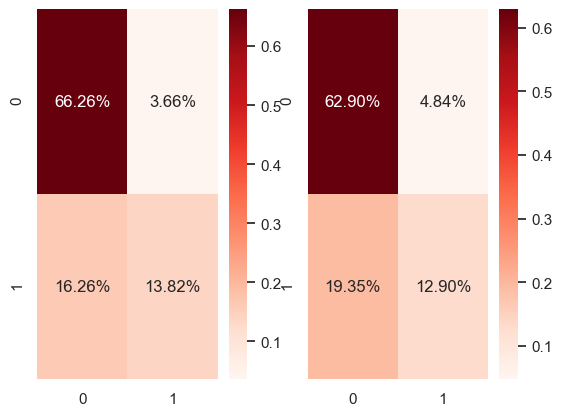

In [69]:
#confusion matrix training set
cm1 = confusion_matrix(y_train,pred_clf_train)
cm2 = confusion_matrix(y_test,pred_clf_test)
figure,(s1,s2) = plt.subplots(1,2)
sns.heatmap(cm1/np.sum(cm1),annot = True , fmt = '0.2%',cmap='Reds', ax = s1,)
sns.heatmap(cm2/np.sum(cm2),annot=True , fmt = '0.2%', cmap='Reds', ax = s2)
plt.show()

## SUPPORT VECTOR MACHINE

In [70]:
#Linear Support Vector Machine
from sklearn.svm import LinearSVC

clt = LinearSVC(C=2 , random_state = 0).fit(x_train,y_train)
print('Coefficients:\n',clt.coef_)
print('Intercepts:\n', clt.intercept_)
print('Accuracy of Linear SVC classifier on training set:{:.2f}'
     .format(clt.score(x_train,y_train)))
print('Accuracy of Linear SVC classifier on test set: {:.2f}'
     .format(clt.score(x_test,y_test)))

Coefficients:
 [[ 0.00091222  0.00682771  0.00726377 -0.00419781  0.28968255  0.00576292
  -0.02007055 -0.24301501 -0.23331392  0.11017141 -0.21944036 -0.00450749
  -0.08510544 -0.03351099  0.05924637 -0.03940782  0.0939673   0.15170429
  -0.00737134  0.08396097  0.02586453]]
Intercepts:
 [-0.36082804]
Accuracy of Linear SVC classifier on training set:0.31
Accuracy of Linear SVC classifier on test set: 0.32


In [71]:
pred_clt_train = clt.predict(x_train)
pred_clt_test = clt.predict(x_test)

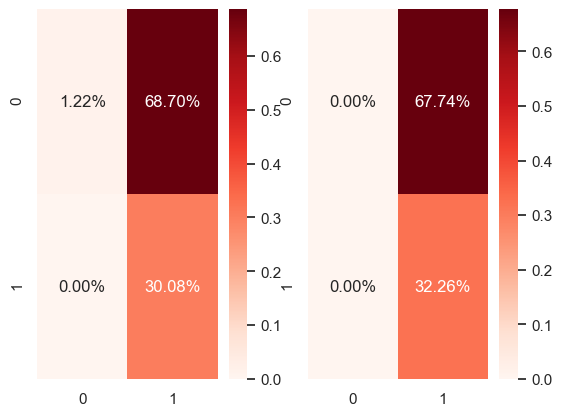

In [72]:
#confusion matrix training set
cm3 = confusion_matrix(y_train,pred_clt_train)
cm4 = confusion_matrix(y_test,pred_clt_test)
figure,(s1,s2) = plt.subplots(1,2)
sns.heatmap(cm3/np.sum(cm3),annot = True , fmt = '0.2%',cmap='Reds', ax = s1,)
sns.heatmap(cm4/np.sum(cm4),annot=True , fmt = '0.2%', cmap='Reds', ax = s2)
plt.show()

## DECISION TREE

In [73]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=4, random_state=0).fit(x_train,y_train)
print('Accuracy of Decision Tree classifier on training set:{:.2f}'
     .format(dt.score(x_train,y_train)))
print('Accuracy of Decision tree classifier on test set:{:.2f}'
     .format(dt.score(x_test,y_test)))

Accuracy of Decision Tree classifier on training set:0.86
Accuracy of Decision tree classifier on test set:0.74


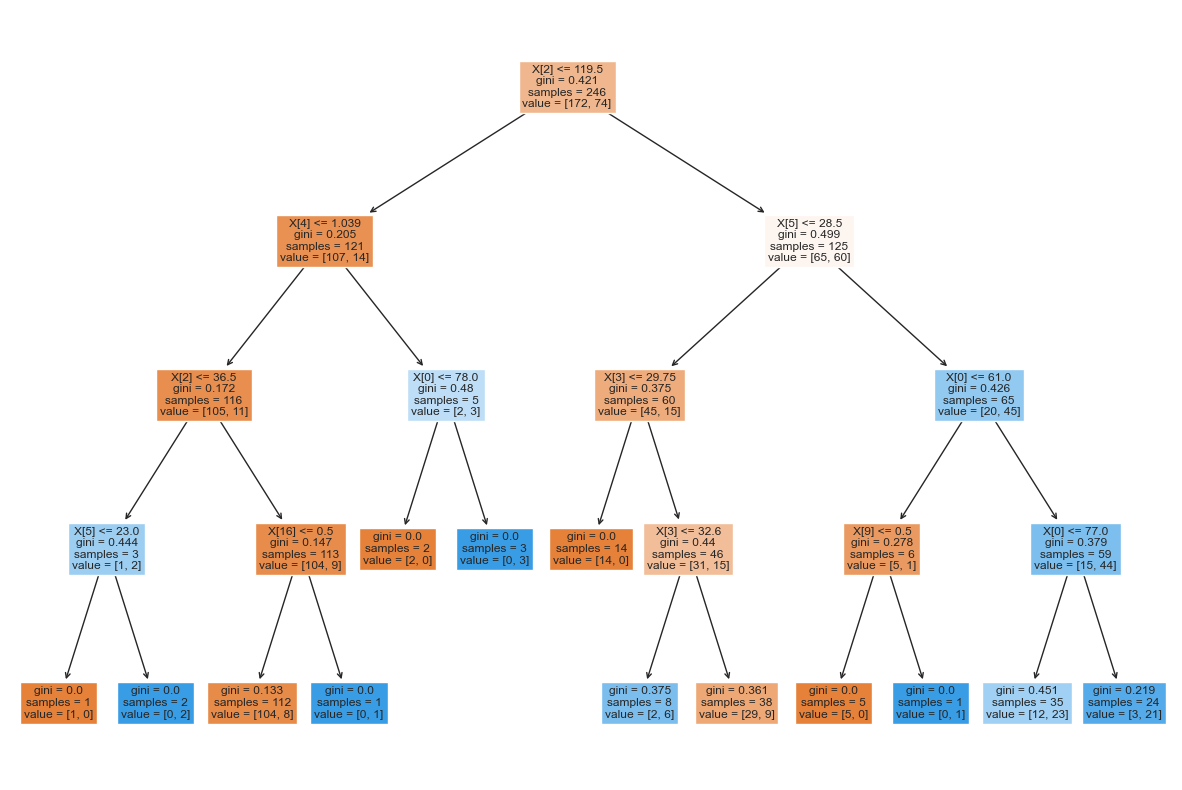

In [74]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(dt,filled=True)
plt.show()

In [75]:
pred_dt_train = dt.predict(x_train)
pred_dt_test = dt.predict(x_test)

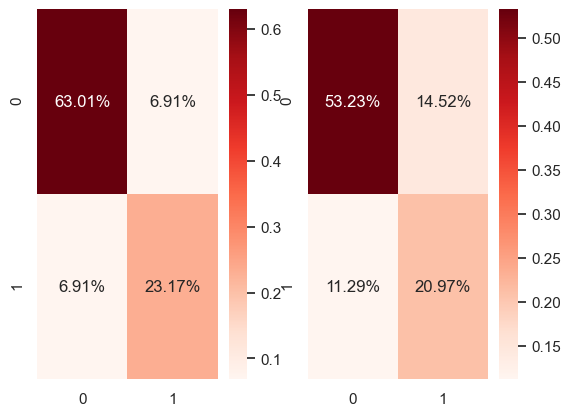

In [76]:
#confusion matrix training set
cm5 = confusion_matrix(y_train,pred_dt_train)
cm6 = confusion_matrix(y_test,pred_dt_test)
figure,(s1,s2) = plt.subplots(1,2)
sns.heatmap(cm5/np.sum(cm5),annot = True , fmt = '0.2%',cmap='Reds', ax = s1,)
sns.heatmap(cm6/np.sum(cm6),annot=True , fmt = '0.2%', cmap='Reds', ax = s2)
plt.show()

## NAIVE BAYES CLASSIFIER

In [77]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB().fit(x_train,y_train)
print('Accuracy score of GaussianNb classifier on training set:{:.2f}'
     .format(nb.score(x_train,y_train)))
print('Accuracy score of GaussianNb classifier on training set: {:.2f}'
     .format(nb.score(x_test,y_test)))

Accuracy score of GaussianNb classifier on training set:0.75
Accuracy score of GaussianNb classifier on training set: 0.68


In [78]:
pred_nb_train = nb.predict(x_train)
pred_nb_test = nb.predict(x_test)

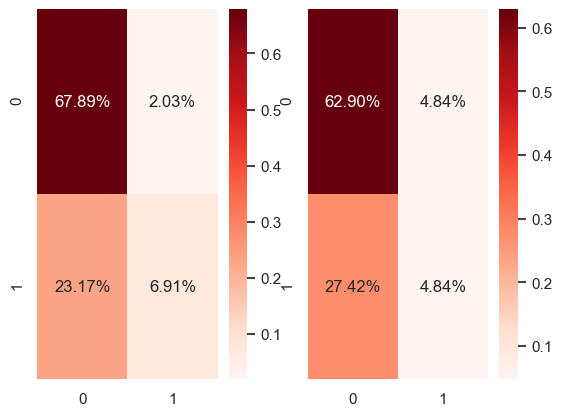

In [79]:
#confusion matrix training set
cm7 = confusion_matrix(y_train,pred_nb_train)
cm8 = confusion_matrix(y_test,pred_nb_test)
figure,(s1,s2) = plt.subplots(1,2)
sns.heatmap(cm7/np.sum(cm7),annot = True , fmt = '0.2%',cmap='Reds', ax = s1,)
sns.heatmap(cm8/np.sum(cm8),annot=True , fmt = '0.2%', cmap='Reds', ax = s2)
plt.show()

## RANDOM FOREST

In [80]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=10,random_state=0).fit(x_train,y_train)
print('Accuracy score of random forest on training set:{:.2f}'
     .format(rf.score(x_train,y_train)))
print('Accuracy score of random forest on test set :{:.2f}'
     .format(rf.score(x_test,y_test)))

Accuracy score of random forest on training set:0.98
Accuracy score of random forest on test set :0.77


In [81]:
pred_rf_train = rf.predict(x_train)
pred_rf_test = rf.predict(x_test)

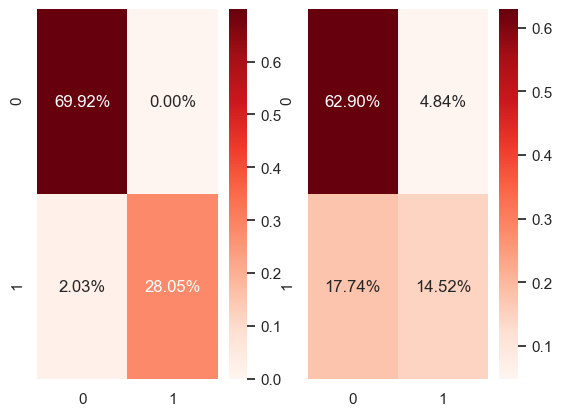

In [82]:
#confusion matrix training set
cm9 = confusion_matrix(y_train,pred_rf_train)
cm10 = confusion_matrix(y_test,pred_rf_test)
figure,(s1,s2) = plt.subplots(1,2)
sns.heatmap(cm9/np.sum(cm9),annot = True , fmt = '0.2%',cmap='Reds', ax = s1,)
sns.heatmap(cm10/np.sum(cm10),annot=True , fmt = '0.2%', cmap='Reds', ax = s2)
plt.show()

## K-NEAREST NEIGHBORS

In [83]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
print('Accuracy score of KNN classifier of training set:{:.2f}'
     .format(knn.score(x_train,y_train)))
print('Accuracy score of KNN classifier of test set:{:.2f}'
     .format(knn.score(x_test,y_test)))

Accuracy score of KNN classifier of training set:0.81
Accuracy score of KNN classifier of test set:0.74


In [84]:
pred_knn_train = knn.predict(x_train)
pred_knn_test = knn.predict(x_test)

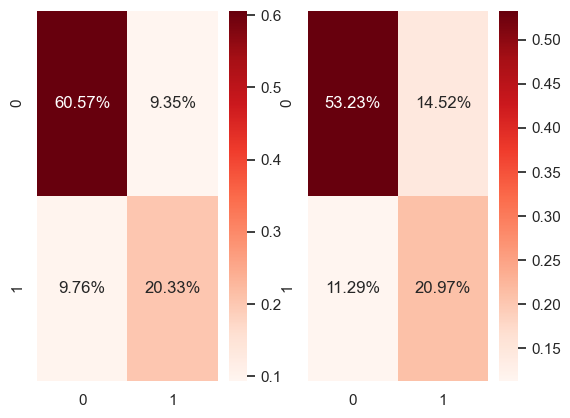

In [85]:
#confusion matrix training set
cm11 = confusion_matrix(y_train,pred_knn_train)
cm12 = confusion_matrix(y_test,pred_knn_test)
figure,(s1,s2) = plt.subplots(1,2)
sns.heatmap(cm11/np.sum(cm11),annot = True , fmt = '0.2%',cmap='Reds', ax = s1,)
sns.heatmap(cm12/np.sum(cm12),annot=True , fmt = '0.2%', cmap='Reds', ax = s2)
plt.show()

## TEST MODEL ACCURACY'S

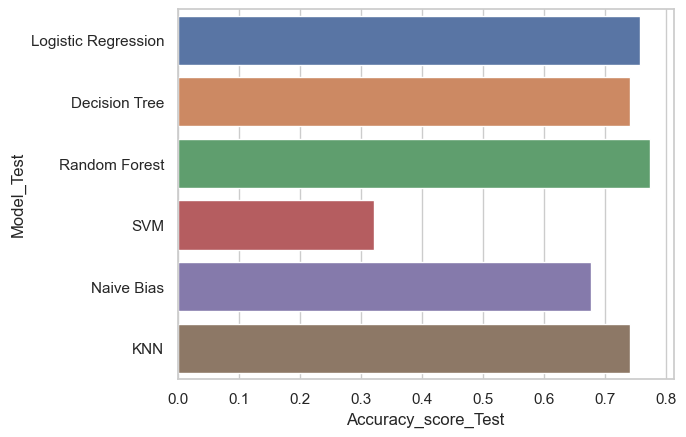

In [86]:
models = pd.DataFrame({
    'Model_Test':['Logistic Regression', 'Decision Tree', 'Random Forest','SVM', 'Naive Bias','KNN'],
    'Accuracy_score_Test' :[clf.score(x_test,y_test), dt.score(x_test,y_test), rf.score(x_test,y_test)
                       ,clt.score(x_test,y_test),nb.score(x_test,y_test),knn.score(x_test,y_test)]
})
models
sns.barplot(x='Accuracy_score_Test', y='Model_Test', data=models)

models.sort_values(by='Accuracy_score_Test', ascending=False)
plt.show()

## TRAINING MODEL ACCURACY'S

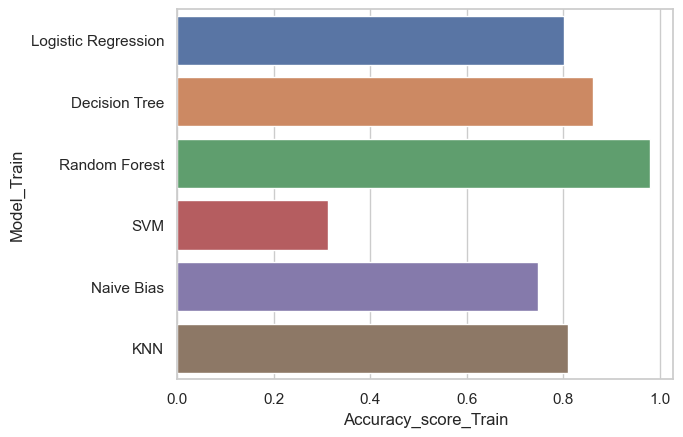

In [87]:
models = pd.DataFrame({
    'Model_Train':['Logistic Regression', 'Decision Tree', 'Random Forest','SVM', 'Naive Bias','KNN'],
    'Accuracy_score_Train' :[clf.score(x_train,y_train), dt.score(x_train,y_train), rf.score(x_train,y_train)
                       ,clt.score(x_train,y_train),nb.score(x_train,y_train),knn.score(x_train,y_train)]
})
models
sns.barplot(x='Accuracy_score_Train', y='Model_Train', data=models)

models.sort_values(by='Accuracy_score_Train', ascending=False)
plt.show()

## Conclusion

The highest accuracy of test set was obtained by "KNeigborsClassifier(knn)"

The highest accuracy of train set was obtained by "RandomForest(rf)"

## THANK YOU..............